Name: Rohan Malve

Class: BE-B                                              

Roll No.: 26

Course: Laboratory Practice-V (DL)

Practical No.: 08

Problem Statement: 
Convolutional neural network (CNN) (Any One from the following)
1. Use any dataset of plant disease and design a plant disease detection system using CNN.
2. Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

# Importing Required Packages and Modules

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# Loading Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploring the Data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

# Data Pre-Processing

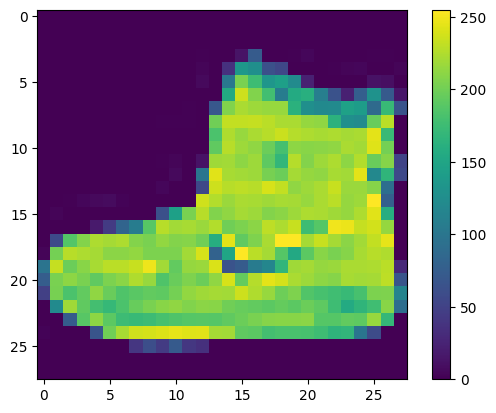

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

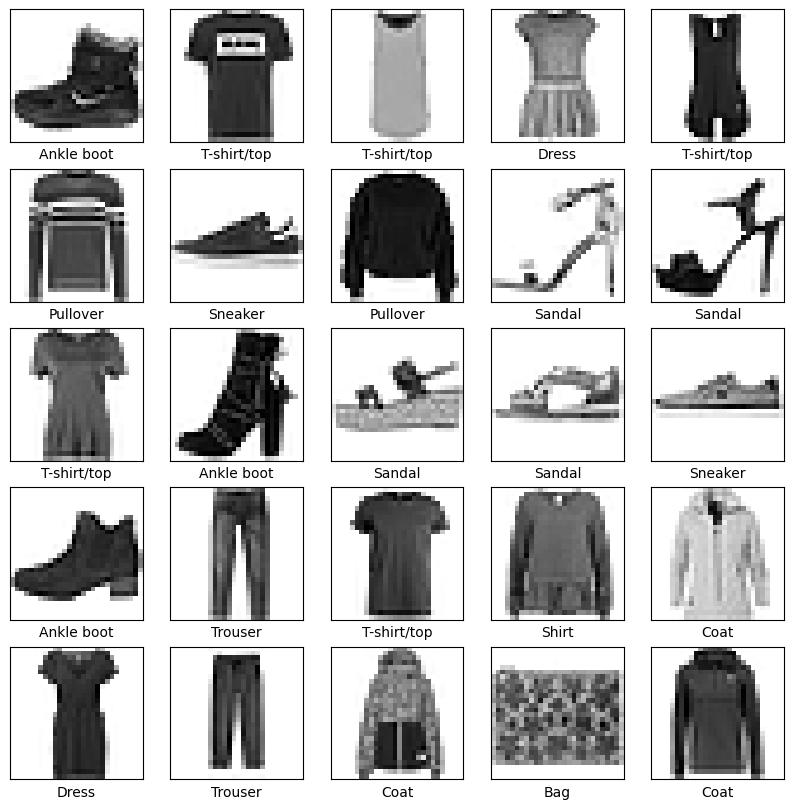

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the Model

Setting up the Layers

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compiling the Model

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the Model

In [14]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 18s 8ms/step - loss: 0.4991 - accuracy: 0.8242
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3739 - accuracy: 0.8639
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3384 - accuracy: 0.8764
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3119 - accuracy: 0.8856
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2965 - accuracy: 0.8904
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2800 - accuracy: 0.8951
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2694 - accuracy: 0.8993
Epoch 8/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2564 - accuracy: 0.9041
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2487 - accuracy: 0.9073
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 

Evaluating the Model's Accuracy on Test Dataset

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4079 - accuracy: 0.8873 - 716ms/epoch - 2ms/step

Test accuracy: 0.8873000144958496


Making Predictions

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]

array([1.78055970e-17, 1.09105888e-22, 2.49189764e-17, 3.35610542e-18,
       2.92548471e-17, 3.29685115e-08, 4.89138201e-18, 1.20308534e-04,
       4.75860162e-14, 9.99879539e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verifying Predictions

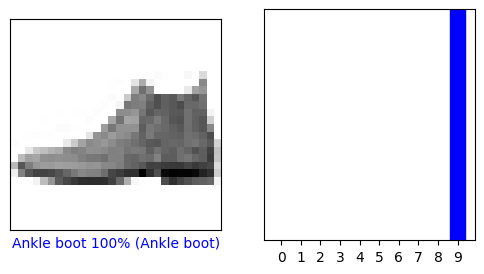

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

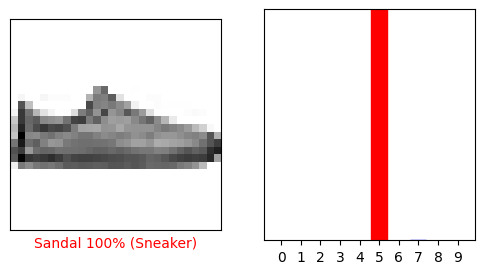

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

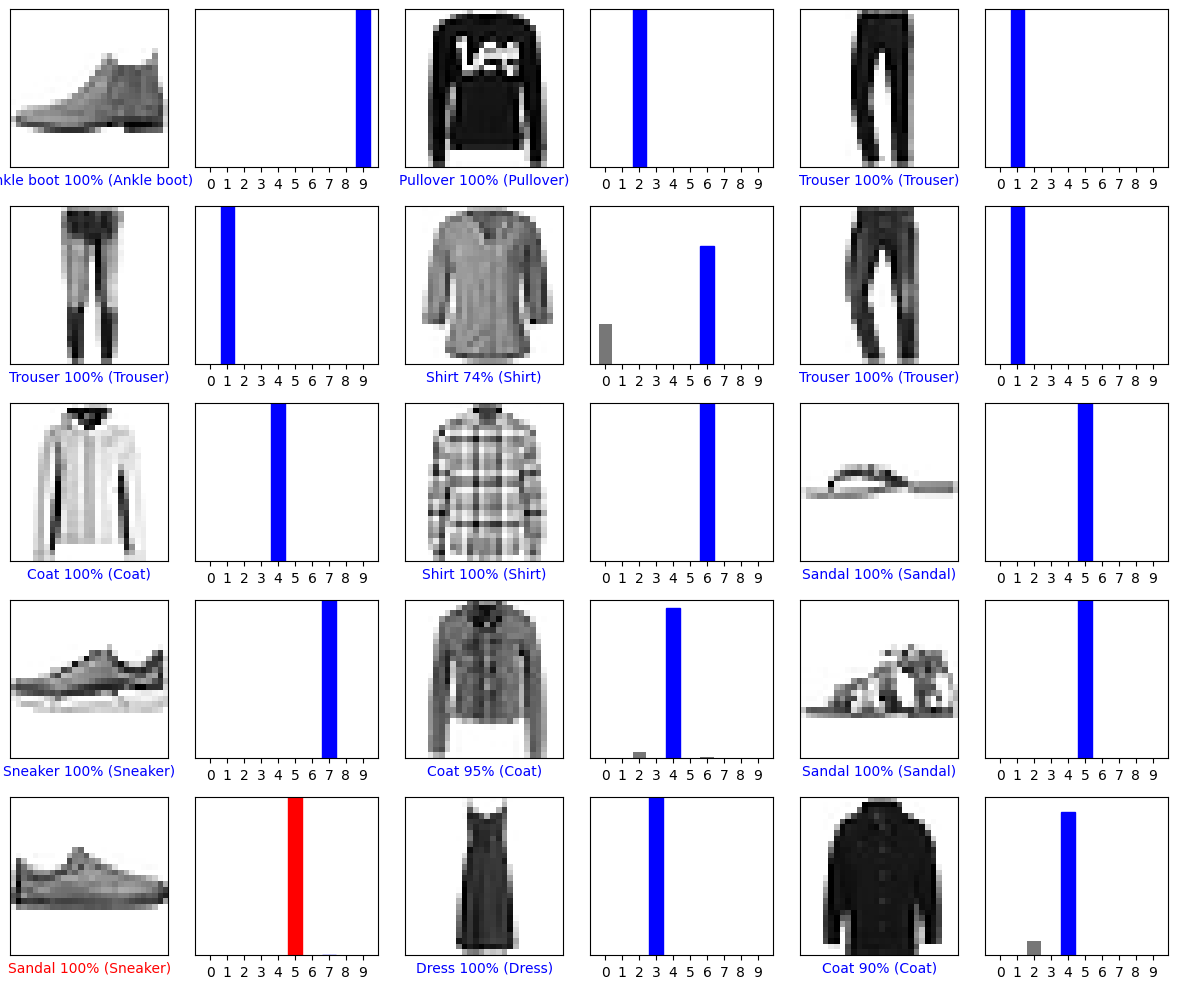

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Using the Trained Model

In [24]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[8.0684411e-05 3.4843218e-21 9.9795425e-01 1.2028922e-12 1.9109969e-03
  5.1223884e-17 5.3969190e-05 1.8302497e-27 3.4051112e-15 1.6315401e-17]]


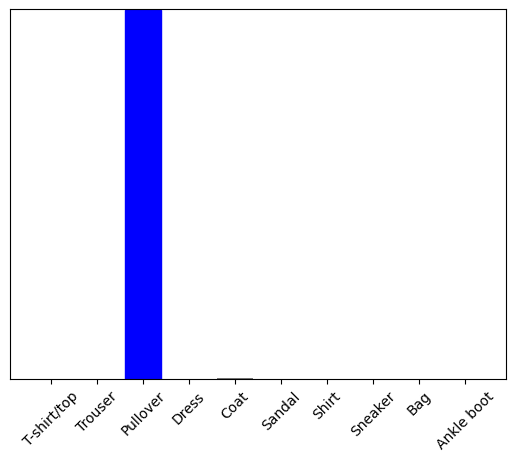

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

2